#                     Digit Recognizer

###   I.  Introduction

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this section, our goal is to correctly identify digits from a dataset of tens of thousands of handwritten images.

### II.  About dataset

The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

Visually, if we omit the "pixel" prefix, the pixels make up the image like this:

The test data set, (test.csv), is the same as the training set, except that it does not contain the "label" column.

Importing Required Packages

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

The Preview of data set is:

In [2]:
dataset = pd.read_csv('data Set/train.csv')
dataset

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


So, from dataset we observe that 1st column is the Label or the class column,and the remaining 784 columns(pixel0 to pixel783) are the intensity of the pixel values of the digits.
The intensity of the pixels are integers which range from (0 to 255) .So,256 possible grey intensity colors are possible.


Now,Importing dataset as matrix or array of elements

In [3]:
data = pd.read_csv('data Set/train.csv').values;
test_data= pd.read_csv('data Set/test.csv');

Now,Seggregating x and y columns for decision tree classification

In [5]:
X=dataset.iloc[:,1:].values
Y=dataset.iloc[:,:1].values

Here, X contains features and y contains labels

## 1. Splitting the Dataset to training and testing set


Now,Splitting into training and test dataset.
Here,i have randomly divided my dataset into splits with test_size ratio 0.3 of whole dataset.
Another way of dividing is splitting into half i.e 21000 for the training and 21000for the testing.

In [6]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

Now,Visualising the digit in dataset

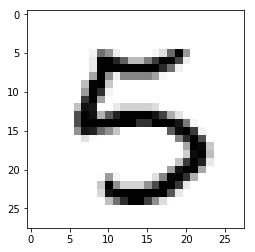

In [6]:
d=X_test[8]
d.shape=(28,28)
plt.imshow(255-d,cmap="gray")
plt.show()

They are many classification techiques,here we apply 2 main techniques
- Decision tree classifier(Entropy and Information gain)
- Navie Bayes

### 1.Decision Tree 
Decision tree is a type of supervised learning algorithm (having a pre-defined target variable) that is mostly used in classification problems. It works for both categorical and continuous input and output variables. In this technique, we split the population or sample into two or more homogeneous sets (or sub-populations) based on most significant splitter / differentiator in input variables.

It uses Modified CART TREE internally

### Decision Tree using GINI Index

In [7]:
clf_gini = DecisionTreeClassifier(criterion='gini')
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Accuracy of the gini index based tree is:

In [8]:
y_pred=clf_gini.predict(X_test)
print ("The Accuracy is:",accuracy_score(y_test, y_pred)*100)

The Accuracy is: 85.27777777777777


Confusion Matrix:

In [9]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1135,    1,   19,   11,    5,   22,   23,    4,    7,   15],
       [   3, 1358,   14,   14,    2,    6,    6,    9,    8,    4],
       [  23,   13,  993,   36,   25,   13,   25,   26,   38,    7],
       [  14,    7,   40, 1051,   12,   80,   11,   18,   35,   28],
       [   5,   18,   13,    9, 1013,   16,   16,   22,   28,   64],
       [  21,   18,   14,   60,   13,  929,   38,   14,   43,   28],
       [  24,   10,   24,    8,   13,   35, 1103,    2,   27,    4],
       [   4,   15,   30,   24,   16,    8,    1, 1142,    5,   39],
       [  13,   30,   54,   40,   29,   52,   28,   17,  941,   32],
       [   5,    5,   12,   26,   56,   22,    8,   40,   33, 1080]],
      dtype=int64)

Now,testing manually

The predicted value is: [7]


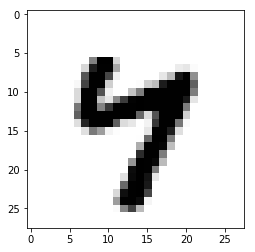

In [10]:
d=X_test[3,:]
d.shape=(28,28)
#100,8,
plt.imshow(255-d,cmap="gray")
print("The predicted value is:",clf_gini.predict([X_test[3,:]]))
plt.show()

As, we can see above the predicted value and plotted value(actual written digit) is the same

### Decision tree Training using Entropy (Information Gain)

In [11]:
clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [12]:
y_pred=clf_entropy.predict(X_test)
print ("The Accuracy is:",accuracy_score(y_test, y_pred)*100)

The Accuracy is: 85.40476190476191


Confusion Matrix is:

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1148,    2,   15,   11,    4,   15,   23,    3,    9,   12],
       [   0, 1360,   11,    8,    4,    6,    6,   10,    8,   11],
       [  14,   13, 1004,   44,   19,   15,   15,   33,   22,   20],
       [   8,    9,   38, 1055,   10,   76,    8,   22,   44,   26],
       [   5,    4,   16,    7, 1003,   16,   14,   24,   22,   93],
       [  24,    9,   20,   67,   17,  925,   47,    6,   27,   36],
       [  14,    3,   32,   13,   22,   27, 1098,    8,   20,   13],
       [   5,    9,   39,   27,   17,    4,    3, 1136,    6,   38],
       [   5,   22,   35,   51,   22,   41,   20,   14,  970,   56],
       [   9,    7,    9,   27,   65,   33,    6,   31,   38, 1062]],
      dtype=int64)

Finding out evaluation metrics :F1 Score,Precision and Recall

In [14]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

#Splitting dataset

X_train1, X_test1, y_train1, y_test1 = train_test_split( X, Y, test_size = 0.3, random_state = 100)


#Decison tree
clf_gini2 = DecisionTreeClassifier()
clf_gini2.fit(X_train1, y_train1)
y_pred=clf_gini2.predict(X_test1)
print ("The Accuracy is:",accuracy_score(y_test1, y_pred)*100)
print("F1 Score:",f1_score(y_test1, y_pred, average="macro"))
print("Precision is:",precision_score(y_test1, y_pred, average="macro"))
print("Recall is:",recall_score(y_test1, y_pred, average="macro")) 


The Accuracy is: 85.06349206349206
F1 Score: 0.8487409594691906
Precision is: 0.8487959515039802
Recall is: 0.8488822041634227


Now,using t-test for comparing decision tree using gini index and using information entropy

In [15]:
from mlxtend.evaluate import paired_ttest_kfold_cv

t, p = paired_ttest_kfold_cv(estimator1=clf_entropy,
                              estimator2=clf_gini,
                              X=X, y=Y,
                              random_seed=1)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: 4.488
p value: 0.002


## Naive Bayes Classification

In [16]:
from sklearn.naive_bayes import MultinomialNB
gnb = MultinomialNB()
y_train1 = y_train.ravel()


Accuracy is:

In [17]:
y_pred = gnb.fit(X_train, y_train1).predict(X_test)
y_pred
y_test1 = y_test.ravel()
y_test1
print ("The Accuracy is:",
accuracy_score(y_test1, y_pred)*100)

The Accuracy is: 82.34126984126983


Confusion Matrix is:

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test1, y_pred)

array([[1133,    0,    7,    5,    2,   16,   17,    0,   60,    2],
       [   0, 1320,   10,   14,    0,    5,    8,    1,   63,    3],
       [  20,   13,  997,   18,   12,    2,   49,   11,   69,    8],
       [   4,   28,   59, 1051,    4,   28,   14,    6,   64,   38],
       [   2,    5,   11,    0,  886,    1,   23,    4,   51,  221],
       [  32,   12,    4,  147,   21,  766,   24,    5,  118,   49],
       [  10,   24,   18,    0,    5,   24, 1152,    0,   17,    0],
       [   6,   28,   12,    3,   25,    1,    2, 1048,   42,  117],
       [   6,   62,   18,   74,   13,   54,   11,    5,  952,   41],
       [   7,    9,    3,   12,   85,    6,    0,   37,   58, 1070]],
      dtype=int64)

## 2. Splitting into half the ratio of the dataset.

In [19]:
X_train=data[0:21000,1:]
X_test=data[21000:,1:]
y_train=data[0:21000,0]
y_test=data[21000:,0]

Decision tree using Gini index

In [20]:
clf_gini1 = DecisionTreeClassifier()
clf_gini1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Accuracy is

In [21]:
y_pred=clf_gini1.predict(X_test)
print ("The Accuracy is:",accuracy_score(y_test, y_pred)*100)

The Accuracy is: 83.74761904761905


Decison tree with restrictions


In [22]:
clf_gini2 = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=20, min_samples_leaf=5)
clf_gini2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

Accuracy of the gini index restricted based tree

In [23]:
y_pred=clf_gini2.predict(X_test)
print ("The Accuracy is:",accuracy_score(y_test, y_pred)*100)

The Accuracy is: 83.97142857142858


Decision tree using Entropy

In [24]:
clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy.fit(X_train, y_train)
y_pred=clf_entropy.predict(X_test)

print ("The Accuracy is:",accuracy_score(y_test, y_pred)*100)

The Accuracy is: 84.89047619047619


Here, I made an observation that after splitting dataset into half and making into training and test datasets,there is no increase in accuracy

## 3.Stratified K-Fold method for splitting

In [25]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X, Y)
print(skf)  

max=0;
for train_index, test_index in skf.split(X, Y):
   print("TRAIN:", train_index, "TEST:", test_index)
   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = Y[train_index], Y[test_index]
   clf_entropy = DecisionTreeClassifier()
   clf_entropy.fit(X_train, y_train)
   y_pred=clf_entropy.predict(X_test)
   maxt=accuracy_score(y_test, y_pred)
   print ("The Accuracy is:",maxt*100)
   if (maxt>max):
    max=maxt
    max_X_train,max_X_test=X[train_index], X[test_index]
    max_y_train,max_y_test=Y[train_index], Y[test_index]
    

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
TRAIN: [ 3876  3881  3889 ... 41997 41998 41999] TEST: [   0    1    2 ... 4638 4643 4653]
The Accuracy is: 85.8297669995245
TRAIN: [    0     1     2 ... 41997 41998 41999] TEST: [3876 3881 3889 ... 8654 8657 8660]
The Accuracy is: 85.96574690770694
TRAIN: [    0     1     2 ... 41997 41998 41999] TEST: [ 7997  7998  8006 ... 12925 12930 12945]
The Accuracy is: 85.95906711089957
TRAIN: [    0     1     2 ... 41997 41998 41999] TEST: [12123 12160 12175 ... 17240 17250 17252]
The Accuracy is: 85.97952868364675
TRAIN: [    0     1     2 ... 41997 41998 41999] TEST: [16468 16482 16494 ... 21306 21310 21311]
The Accuracy is: 85.73809523809524
TRAIN: [    0     1     2 ... 41997 41998 41999] TEST: [20643 20646 20658 ... 25538 25554 25570]
The Accuracy is: 85.06787330316742
TRAIN: [    0     1     2 ... 41997 41998 41999] TEST: [24892 24897 24902 ... 29590 29607 29613]
The Accuracy is: 85.04405810907359
TRAIN: [    0     1     2 

Here, we are storing the split of maximum accuracy into max_X_train,max_X_test..etc

  #  Using Ensemble Methods to improve Efficiency

An ensemble method is a technique that combines the predictions from multiple machine learning algorithms together to make more accurate predictions than any individual model.

### Bagging

Bootstrap Aggregation (or Bagging for short)  is a general procedure that can be used to reduce the variance for those algorithm that have high variance. Here idea is to create several subsets of data from training sample chosen randomly with replacement. Now, each collection of subset data is used to train their decision trees. As a result, we end up with an ensemble of different models. Average of all the predictions from different trees are used which is more robust than a single decision tree.


In [26]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier( DecisionTreeClassifier(), max_samples=0.5, max_features=0.5)

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

bagging.fit(X_train,y_train.ravel())
y_pred=bagging.predict(X_test)
print("The Accuracy is:",accuracy_score(y_pred,y_test.ravel())*100)

The Accuracy is: 93.1031746031746


now measuring precsion and recall

In [27]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print("F1 Score:",f1_score(y_test, y_pred, average="macro"))
print("Precision is:",precision_score(y_test, y_pred, average="macro"))
print("Recall is:",recall_score(y_test, y_pred, average="macro")) 

F1 Score: 0.930253133689962
Precision is: 0.9305934930587458
Recall is: 0.9303819339177657


Here we have achieved a accuracy of 92% 

Using the max accurate stratified spilt from the above stratified splitting 

In [28]:
bagging.fit(max_X_train,max_y_train.ravel())
y_pred=bagging.predict(max_X_test)
print("The Accuracy is:",accuracy_score(y_pred,max_y_test.ravel())*100)

The Accuracy is: 93.89895138226882


Now, we have increased the accuracy to 93%

# KNN Learning

In [6]:
from sklearn.neighbors import KNeighborsClassifier 
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

C:\Users\SAI TEJA\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


[[1234    1    0    0    0    1    4    1    0    1]
 [   0 1417    4    0    0    0    1    1    1    0]
 [  11   14 1132    5    1    1    1   25    7    2]
 [   2    5    6 1253    0   13    0    5    6    6]
 [   2   12    0    0 1143    0    6    2    0   39]
 [   0    3    0   16    1 1138   10    3    0    7]
 [   3    2    1    0    1    4 1239    0    0    0]
 [   0   20    4    0    0    0    0 1243    0   17]
 [   2   19    3   27    9   28    4    8 1120   16]
 [   5    3    2   10   12    2    1   22    1 1229]]
             precision    recall  f1-score   support

          0       0.98      0.99      0.99      1242
          1       0.95      1.00      0.97      1424
          2       0.98      0.94      0.96      1199
          3       0.96      0.97      0.96      1296
          4       0.98      0.95      0.96      1204
          5       0.96      0.97      0.96      1178
          6       0.98      0.99      0.98      1250
          7       0.95      0.97      0.96  

In [7]:
print ("The Accuracy is:",accuracy_score(y_test, y_pred)*100)

The Accuracy is: 96.41269841269842


Storing the predicted values from bagging to a variable

# Neural Networks
Multi-Layer Perceptron as classifier

In [16]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

C:\Users\SAI TEJA\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[1194    0    5    2    5    3   11    8   12    2]
 [   0 1381    4   11    0    1    2   13   12    0]
 [  12    7 1080   39    9    1    5   25   20    1]
 [   2    2    8 1223    3   23    2   11   14    8]
 [   1    6   13    3 1120    3    5   19    9   25]
 [   6    4    0   37    6 1089    9    7   17    3]
 [  14    5    7    0    7   10 1194    0   13    0]
 [   0    3    9   15    9    2    0 1238    4    4]
 [   6   13    9   25    6   14   13    9 1134    7]
 [   8    1    0   15   47    6    0  126   15 1069]]


In [17]:
print ("The Accuracy is:",accuracy_score(y_test, predictions)*100)

The Accuracy is: 93.03174603174604


# Convolution Neural Networks

In [8]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12


Using TensorFlow backend.


In [10]:
img_rows, img_cols = 28, 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

11493376/11490434 [==============================] - 13s 1us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 1071s 18ms/step - loss: 0.2506 - acc: 0.9236 - val_loss: 0.0570 - val_acc: 0.9821
Epoch 2/12
60000/60000 [==============================] - 1085s 18ms/step - loss: 0.0886 - acc: 0.9736 - val_loss: 0.0424 - val_acc: 0.9866
Epoch 3/12
60000/60000 [==============================] - 1041s 17ms/step - loss: 0.0674 - acc: 0.9799 - val_loss: 0.0372 - val_acc: 0.9872
Epoch 4/12
13696/60000 [=====>........................] - ETA: 2:51:26 - loss: 0.0568 - acc: 0.9827

KeyboardInterrupt: 

In [20]:
X_test1 = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

y_pred=model.predict(X_test)
# y_pred.reshape(y_pred.shape[0],1,1,1)
y_pred.ravel()
#print(classification_report(y_test, y_pred))

ValueError: Error when checking input: expected conv2d_1_input to have 4 dimensions, but got array with shape (12600, 784)

In [22]:
print(y_pred[0,:])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [12]:
X_sub=test_data.iloc[:,:].values
y_sub_pred=classifier.predict(X_sub)

My 1st Submission:Writing the predicted values of test_data into csv file(submission)

In [15]:
y_sub_pred

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [14]:
import csv
with open('submission1.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)

    for i in range(28000):
        row=[i+1,y_sub_pred[i]]
        writer.writerow(row)

csvFile.close()

I have achieved an accuracy of 93.757 on test data.The accuracy was given by kaggle